# Soluciones a los ejercicios del Capítulo 5

## 5.1 Arreglos bidimensionales y grafos

### Listados de código

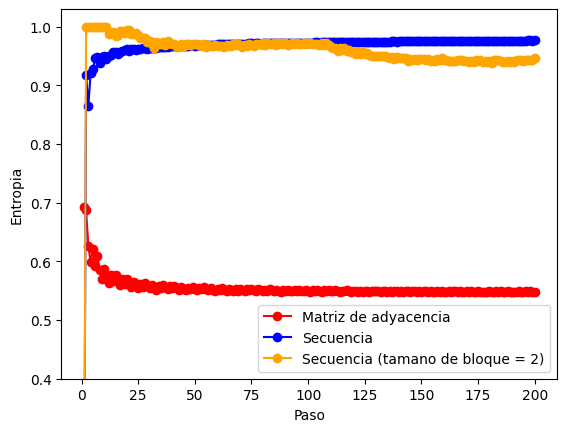

In [3]:
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import entropy
    

def two_rate(nb_list):
    """Esta funcion toma una lista de numeros, junta los digitos
    y devuelve una lista de numeros de dos dígitos"""
    str_list = [str(n) for n in nb_list]
    string = ''.join(map(str,str_list))
    return [int(string[i:i+2]) for i in range(0, len(string), 2)]

#Numero de pasos con que se construye nuestro grafo ZK
nb_steps = 200
#Inicializamos listas de entropia 
I_Adjacency = [] #Para matriz de adyacencia
I_Sequence = [] #Para secuencia de grados
I_Sequence_two_rate = [] #Para secuencia de grados (2-bloques)


G = nx.Graph()
G.add_node(1) 
# Calculamos entropias en cada paso de construccion
for support_node in range(1, nb_steps + 1):
    nb_available_edges = support_node - G.degree[support_node]
    for i in range(1, nb_available_edges + 1):
        G.add_edge(support_node, support_node + i)
    
    # Matriz de adyacencia
    A = nx.to_numpy_array(G, dtype=int) 
    # Conteo de frecuencias
    unique, frequency = np.unique(A, return_counts = True) 
    # Entropia desde la matriz de adyacencia
    I_Adjacency.append(entropy(frequency))
    
    #Secuencia de grados
    degree_sequence = [d for n, d in G.degree()]
    #Secuencia de grados (2-bloques)
    degree_seq_two_rate = two_rate(degree_sequence)
    # Conteo de frecuencias y entropias 
    unique, frequency = np.unique(degree_sequence, return_counts = True)
    I_Sequence.append(entropy(frequency, base=len(frequency) 
                              if len(frequency)>1 else 2))
    unique, frequency = np.unique(degree_seq_two_rate, return_counts = True)
    I_Sequence_two_rate.append(entropy(frequency, base=len(frequency) 
                                       if len(frequency)>1 else 2))

#Graficamos
steps = list(range(1, nb_steps+1))
plt.plot(steps, I_Adjacency,"-o",color="red", label="Matriz de adyacencia")
plt.plot(steps, I_Sequence,"-o", color='blue', label="Secuencia")
plt.plot(steps, I_Sequence_two_rate,"-o", color='orange', 
         label="Secuencia (tamano de bloque = 2)")
plt.ylim([0.4,1.03])
plt.xlabel("Paso")
plt.ylabel("Entropia")
plt.legend()
plt.savefig("fig5_4a.png")

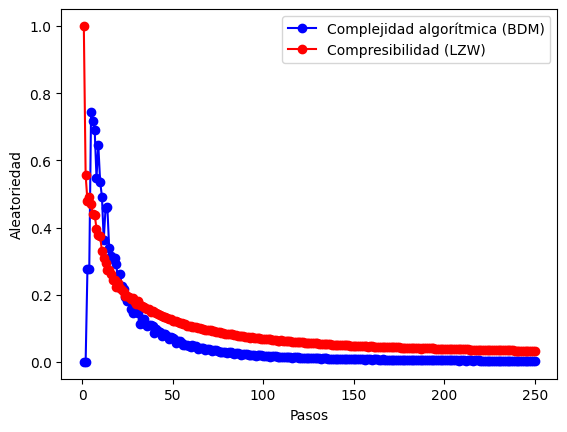

In [4]:
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np 
from pybdm import BDM, PartitionIgnore

# Del Ejercicio 2.2
def compress_ratio(uncompressed):
    """Comprime una cadena , y devuelve la razón de compresibilidad."""
    initial_length = len(uncompressed)

    keys_list = list(sorted(set(uncompressed)))
    dict_size = len(keys_list)
    dictionary = {keys_list[i]:i+1 for i in range(dict_size)}

    result = []
    while len(uncompressed) > 0:
        w = uncompressed[0]
        index = 1 
        while w in dictionary:
            wc = w
            if index < len(uncompressed): 
               w += uncompressed[index]
            else:
                break
            index += 1
        result.append(dictionary[wc]) 
        uncompressed = uncompressed.replace(wc, '', 1) 
        dictionary[w] = dict_size + 1
        dict_size += 1 
    
    result_string = ''
    for n in result:
        result_string += str(n)

    return len(result_string)/initial_length
    
# Numero de pasos con que se construye nuestro grafo ZK
nb_steps = 250
bdm = BDM(ndim=2, partition=PartitionIgnore)
# Inicializamos listas de BDM y compresibilidad
K_Adjacency = []
compressibility = []


G = nx.Graph()
G.add_node(1)    
# Calculamos las medidas de aleatoriedad en cada paso de construccion
for support_node in range(1, nb_steps + 1):
    nb_available_edges = support_node - G.degree[support_node]
    for i in range(1, nb_available_edges + 1):
        G.add_edge(support_node, support_node + i)
    
    # Calculamos BDM
    A = nx.to_numpy_array(G, dtype=int)
    # Con esta condicion evitamos una excepcion
    BDM_value = bdm.bdm(A, normalized=True) if support_node > 2 else 0.0
    K_Adjacency.append(BDM_value)
    # Calculamos compresibilidad
    A_flattened = np.ndarray.flatten(A, order='C')
    A_string = ""
    for digit in A_flattened:
        A_string += str(digit)
    compressibility.append(compress_ratio(A_string))

#Graficamos
steps = range(1, nb_steps+1)
plt.plot(steps, K_Adjacency,"-o",color="blue", label="Complejidad algorítmica (BDM)")
plt.plot(steps, compressibility,"-o",color="red", label="Compresibilidad (LZW)")
#plt.ylim([0.0,0.1])
plt.xlabel("Pasos")
plt.ylabel("Aleatoriedad")
plt.legend()
plt.savefig("fig5_4b.png")

### Ejercicio 5.1

In [5]:
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np 
from pybdm import BDM, PartitionIgnore
from scipy.stats import entropy

# Del Ejercicio 2.2
def compress_ratio(uncompressed):
    """Comprime una cadena , y devuelve la razón de compresibilidad."""
    initial_length = len(uncompressed)

    keys_list = list(sorted(set(uncompressed)))
    dict_size = len(keys_list)
    dictionary = {keys_list[i]:i+1 for i in range(dict_size)}

    result = []
    while len(uncompressed) > 0:
        w = uncompressed[0]
        index = 1 
        while w in dictionary:
            wc = w
            if index < len(uncompressed): 
               w += uncompressed[index]
            else:
                break
            index += 1
        result.append(dictionary[wc]) 
        uncompressed = uncompressed.replace(wc, '', 1) 
        dictionary[w] = dict_size + 1
        dict_size += 1 
    
    result_string = ''
    for n in result:
        result_string += str(n)

    return len(result_string)/initial_length
    

def from_decimal_to_binary_list(nb):
    binary_nb = list(bin(nb))[2:]
    binary_list = [int(digit) for digit in binary_nb]
    return binary_list
#esta función transforma una lista de números a binario y los une en un arreglo
def from_decimal_list_to_binary_array(nb_list):
    nb_rows,nb_columns = len(nb_list),len(from_decimal_to_binary_list(max(nb_list)))
    binary_array = np.zeros((nb_rows,nb_columns), dtype=int)
    for i in range(nb_rows):
        digits_list = from_decimal_to_binary_list(nb_list[i])
        binary_array[i,nb_columns-len(digits_list):] = digits_list

    return np.array(binary_array, dtype=int)

Así se vería una lista de números transformada a un arreglo binario:

In [6]:
from_decimal_list_to_binary_array(list(range(1,10+1)))

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 0]])

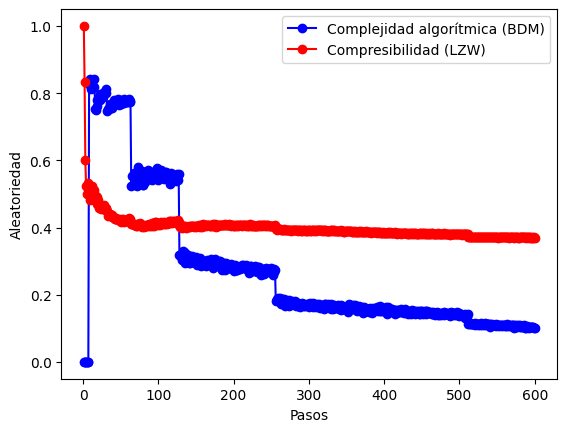

In [7]:
# Numero de pasos con que se construye nuestro grafo ZK
nb_steps = 600
bdm = BDM(ndim=2, partition=PartitionIgnore)
# Inicializamos listas de BDM y compresibilidad
K_Adjacency = []
compressibility = []


G = nx.Graph()
G.add_node(1)    
# Calculamos las medidas de aleatoriedad en cada paso de construccion
for support_node in range(1, nb_steps + 1):
    nb_available_edges = support_node - G.degree[support_node]
    for i in range(1, nb_available_edges + 1):
        G.add_edge(support_node, support_node + i)
    
    # Calculamos BDM
    degree_sequence = [d for n,d in G.degree()]
    # Transformamos la secuencia de grados a un arreglo binario bidimensional
    binary_degree_sequence = from_decimal_list_to_binary_array(degree_sequence)
    # Con esta condicion evitamos una excepcion
    BDM_value = bdm.bdm(binary_degree_sequence, normalized=True) if support_node > 7 else 0.0
    K_Adjacency.append(BDM_value)
    # Calculamos compresibilidad
    binary_flattened = np.ndarray.flatten(binary_degree_sequence, order='C')
    binary_string = ""
    for digit in binary_flattened:
        binary_string += str(digit)
    compressibility.append(compress_ratio(binary_string))

#Graficamos
steps = range(1, nb_steps+1)
plt.plot(steps, K_Adjacency,"-o",color="blue", label="Complejidad algorítmica (BDM)")
plt.plot(steps, compressibility,"-o",color="red", label="Compresibilidad (LZW)")
#plt.ylim([0.0,0.1])
plt.xlabel("Pasos")
plt.ylabel("Aleatoriedad")
plt.legend()
#plt.savefig("fig5_5.png")

En esta gráfica se observa que la complejidad algorítmica decrece notoriamente, mientras que la compresibilidad converge a un valor fijo. Este resultado contrasta con lo obtenido en el Listado 3, donde la compresibilidad se aproxima a la complejidad algorítmica desde arriba. A partir de ambos resultados se constata que la complejidad algorítmica es invariante bajo diferentes representaciones.